In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('data/car_price.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [4]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


### Categorical Columns

In [5]:
cols = ['fuel_type', 'transmission', 'ownership', 'manufacture']

for col in cols:
    print(df[col].unique())

['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
['Manual' 'Automatic']
['1st Owner' '2nd Owner' '3rd Owner' '4th Owner' '5th Owner' '0th Owner']
[2017 2021 2016 2018 2015 2014 2020 2019 2012 2008 2013 2022 2010 2005
 2009 2006 2011 2007 2002 2004 1998 2003 1995 2000 2001 1999]


In [6]:
df = df[df['ownership'] != '0th Owner']

### Numerical Cols

In [7]:
cols = ['car_prices_in_rupee', 'kms_driven', 'ownership', 'engine', 'Seats']
for col in cols:
    df[col] = df[col].str.replace(r"[a-zA-Z]",'')
    df[col] = df[col].str.replace(r",",'')

In [8]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,12.83,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,16.40,60343,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,7.77,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,5.15,69414,Petrol,Manual,1,2016,1199,5


In [9]:
for col in ['kms_driven', 'ownership', 'engine', 'Seats']:
    try:
        df[col] = df[col].astype('int')
    except:
        df[col] = df[col]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5505 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5505 non-null   object
 1   car_prices_in_rupee  5505 non-null   object
 2   kms_driven           5505 non-null   int32 
 3   fuel_type            5505 non-null   object
 4   transmission         5505 non-null   object
 5   ownership            5505 non-null   int32 
 6   manufacture          5505 non-null   int64 
 7   engine               5505 non-null   int32 
 8   Seats                5505 non-null   int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 344.1+ KB


In [11]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('float')
df['car_prices_in_dollar'] = df['car_prices_in_rupee']*1207.22 # 2022 Lakh Rupee to US$ Dollar

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5505 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_name              5505 non-null   object 
 1   car_prices_in_rupee   5505 non-null   float64
 2   kms_driven            5505 non-null   int32  
 3   fuel_type             5505 non-null   object 
 4   transmission          5505 non-null   object 
 5   ownership             5505 non-null   int32  
 6   manufacture           5505 non-null   int64  
 7   engine                5505 non-null   int32  
 8   Seats                 5505 non-null   int32  
 9   car_prices_in_dollar  5505 non-null   float64
dtypes: float64(2), int32(4), int64(1), object(3)
memory usage: 387.1+ KB


In [13]:
df = df.drop(columns=['car_prices_in_rupee'])

### Feature Creation

In [14]:
df['car_nick_name'] = [i.split()[0] for i in df['car_name']]

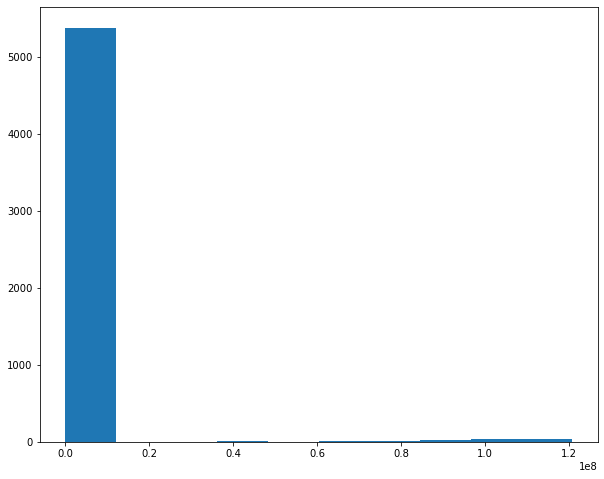

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(df['car_prices_in_dollar'])
!

In [16]:
price_class = []
for i in df['car_prices_in_dollar']:
    
    if i > 40000000:
        i = 'high-class'
    else:
        i = 'low-class'
    price_class.append(i)

df['price_class'] = price_class

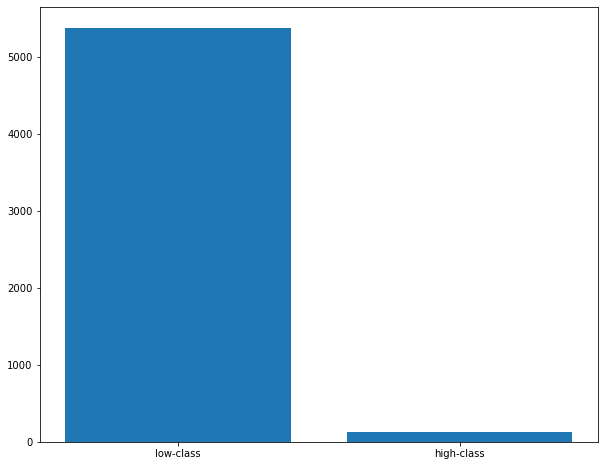

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x = df['price_class'].value_counts().index, height = df['price_class'].value_counts().values)
!

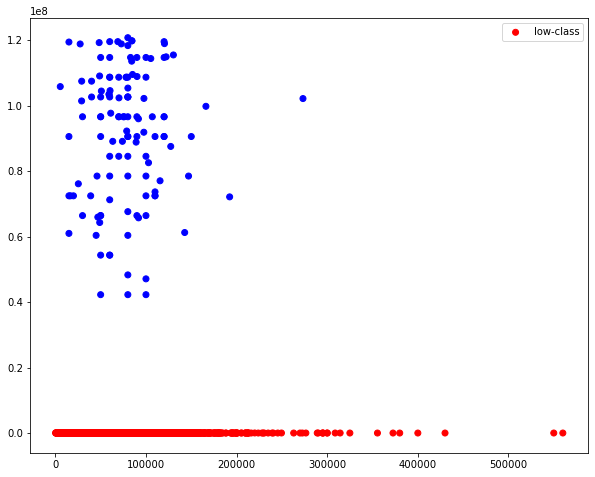

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y = df['car_prices_in_dollar'], x = df['kms_driven'], c=df['price_class'].map({'high-class':'blue', 'low-class':'red'}))
ax.legend(df['price_class'])
!

<BarContainer object of 2 artists>

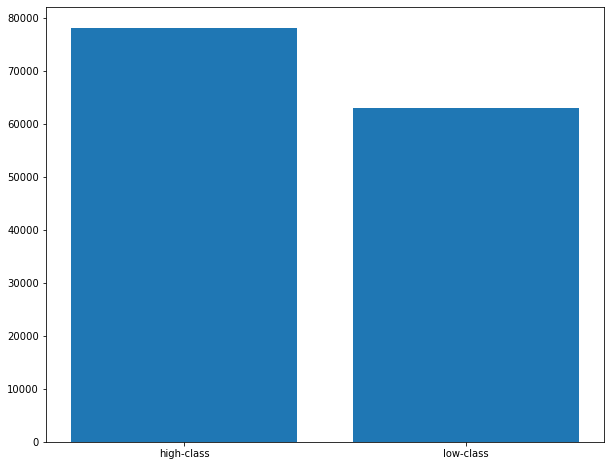

In [19]:
grouped_class = df.groupby(by='price_class').mean()['kms_driven']

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(data = grouped_class, x=grouped_class.index, height=grouped_class.values)

In [20]:
df.to_csv('data/cleaned_car_price.csv')

In [21]:
df_low_price_class_only = df[df['price_class'] == 'low-class']

In [22]:
df_low_price_class_only.to_csv('data/low_class.csv')